## Socioeconomic Status and Mental Health Outcomes

Notebook generated using API access to `claude-sonnet-4-20250514` via the `data-analysis-crow` framework on 23 June 2025.

### Prompt:
The attached dataset contains information about participants in a longitudinal study.
Examine how educational attainment and income level relate to mental health outcomes using linear regression anlayses adjusted for sex.

### Output:

In [ ]:
# Longitudinal Study Analysis: Educational Attainment, Income, and Mental Health
# Analysis of how educational attainment and income level relate to mental health outcomes
# using linear regression analyses adjusted for sex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
# Step 1: Load Data and Perform Descriptive Statistics

# Load the cohort data
df = pd.read_csv('cohort-data.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nColumn names:")
print(df.columns.tolist())

Dataset loaded successfully!
Dataset shape: (10000, 8)

First few rows:
   ID  sex  education  birth_weight  adult_body_weight    height  \
0   1    0          4          3.29          91.882406  1.791942   
1   2    1          3          3.48          81.210334  1.619915   
2   3    0          4          2.49          82.726033  1.666196   
3   4    1          2          2.95          73.985812  1.561972   
4   5    1          2          3.41          74.150145  1.603909   

         salary  depression_symptoms  
0  70603.442728            20.433706  
1  53981.525954            13.147941  
2  64214.582884            55.435987  
3  37668.771059            46.805067  
4  37460.615246            39.486163  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   sex     

In [ ]:
# Detailed descriptive statistics and data exploration

print("=== DESCRIPTIVE STATISTICS ===")
print("\nSummary statistics for all numeric variables:")
print(df.describe())

print("\n=== MISSING DATA ANALYSIS ===")
missing_data = df.isnull().sum()
print(f"Missing data count:\n{missing_data}")
print(f"\nPercentage of missing data:\n{(missing_data/len(df)*100).round(2)}%")

print("\n=== CATEGORICAL VARIABLES ANALYSIS ===")
print("Sex distribution (0=Female, 1=Male based on typical coding):")
print(df['sex'].value_counts().sort_index())
print(f"Sex percentages:\n{df['sex'].value_counts(normalize=True).sort_index() * 100}")

print("\nEducation level distribution:")
print(df['education'].value_counts().sort_index())
print(f"Education percentages:\n{df['education'].value_counts(normalize=True).sort_index() * 100}")

# Check for any outliers or unusual values
print("\n=== DATA QUALITY CHECKS ===")
print("Range checks:")
print(f"Depression symptoms range: {df['depression_symptoms'].min():.2f} to {df['depression_symptoms'].max():.2f}")
print(f"Salary range: ${df['salary'].min():.2f} to ${df['salary'].max():.2f}")
print(f"Education range: {df['education'].min()} to {df['education'].max()}")
print(f"Sex values: {sorted(df['sex'].unique())}")

=== DESCRIPTIVE STATISTICS ===

Summary statistics for all numeric variables:
                ID           sex     education  birth_weight  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      0.489800      2.491000      3.352851   
std     2886.89568      0.499921      1.117248      0.501131   
min        1.00000      0.000000      1.000000      1.540000   
25%     2500.75000      0.000000      1.000000      3.000000   
50%     5000.50000      0.000000      2.000000      3.350000   
75%     7500.25000      1.000000      3.000000      3.690000   
max    10000.00000      1.000000      4.000000      5.310000   

       adult_body_weight       height         salary  depression_symptoms  
count       10000.000000  9850.000000   10000.000000         10000.000000  
mean           83.591150     1.680533   52809.737838            37.391901  
std             8.042747     0.199265   75360.071021            11.546982  
min            63.291330    -0.712977    

In [ ]:
# Step 2: Analysis Plan Development

print("=== ANALYSIS PLAN ===")
print("""
OBJECTIVE: Examine how educational attainment and income level relate to mental health outcomes 
using linear regression analyses adjusted for sex.

KEY VARIABLES:
- Outcome: depression_symptoms (continuous, 0-80.28 range)
- Predictors: education (ordinal, 1-4), salary (continuous)
- Adjustment: sex (binary, 0=Female, 1=Male)

ANALYSIS COMPONENTS:
1. Exploratory Data Analysis
   - Correlation matrix
   - Distribution plots for key variables
   - Scatterplots: education vs depression, salary vs depression
   - Box plots by sex and education level

2. Data Preprocessing
   - Handle missing height data (1.5% missing - may exclude from models)
   - Check for normality of depression symptoms
   - Check for linearity assumptions

3. Linear Regression Models
   Model 1: depression ~ education + sex
   Model 2: depression ~ salary + sex  
   Model 3: depression ~ education + salary + sex (full model)
   
4. Model Diagnostics
   - Residual plots
   - Check assumptions (linearity, normality, homoscedasticity)
   - R-squared values and significance tests

5. Results Interpretation
   - Effect sizes and confidence intervals
   - Clinical/practical significance
   - Adjusted vs unadjusted effects

EXPECTED FINDINGS:
- Higher education may be associated with lower depression symptoms
- Higher income may be associated with lower depression symptoms
- Sex differences in baseline depression levels
""")

# Create analysis-ready dataset
print("\n=== DATA PREPARATION ===")
# Since height has missing values and isn't needed for our analysis, we'll work with complete cases
analysis_df = df[['sex', 'education', 'salary', 'depression_symptoms']].copy()
print(f"Analysis dataset shape: {analysis_df.shape}")
print(f"Complete cases: {len(analysis_df.dropna())}")

# Create meaningful labels for interpretation
analysis_df['sex_label'] = analysis_df['sex'].map({0: 'Female', 1: 'Male'})
analysis_df['education_label'] = analysis_df['education'].map({
    1: 'Level 1 (Lowest)', 2: 'Level 2', 3: 'Level 3', 4: 'Level 4 (Highest)'
})

print("Data preparation completed.")

=== ANALYSIS PLAN ===

OBJECTIVE: Examine how educational attainment and income level relate to mental health outcomes 
using linear regression analyses adjusted for sex.

KEY VARIABLES:
- Outcome: depression_symptoms (continuous, 0-80.28 range)
- Predictors: education (ordinal, 1-4), salary (continuous)
- Adjustment: sex (binary, 0=Female, 1=Male)

ANALYSIS COMPONENTS:
1. Exploratory Data Analysis
   - Correlation matrix
   - Distribution plots for key variables
   - Scatterplots: education vs depression, salary vs depression
   - Box plots by sex and education level

2. Data Preprocessing
   - Handle missing height data (1.5% missing - may exclude from models)
   - Check for normality of depression symptoms
   - Check for linearity assumptions

3. Linear Regression Models
   Model 1: depression ~ education + sex
   Model 2: depression ~ salary + sex  
   Model 3: depression ~ education + salary + sex (full model)

4. Model Diagnostics
   - Residual plots
   - Check assumptions (linea

=== CORRELATION ANALYSIS ===
Correlation matrix:
                       sex  education  salary  depression_symptoms
sex                  1.000     -0.014   0.010               -0.196
education           -0.014      1.000   0.220               -0.426
salary               0.010      0.220   1.000               -0.086
depression_symptoms -0.196     -0.426  -0.086                1.000


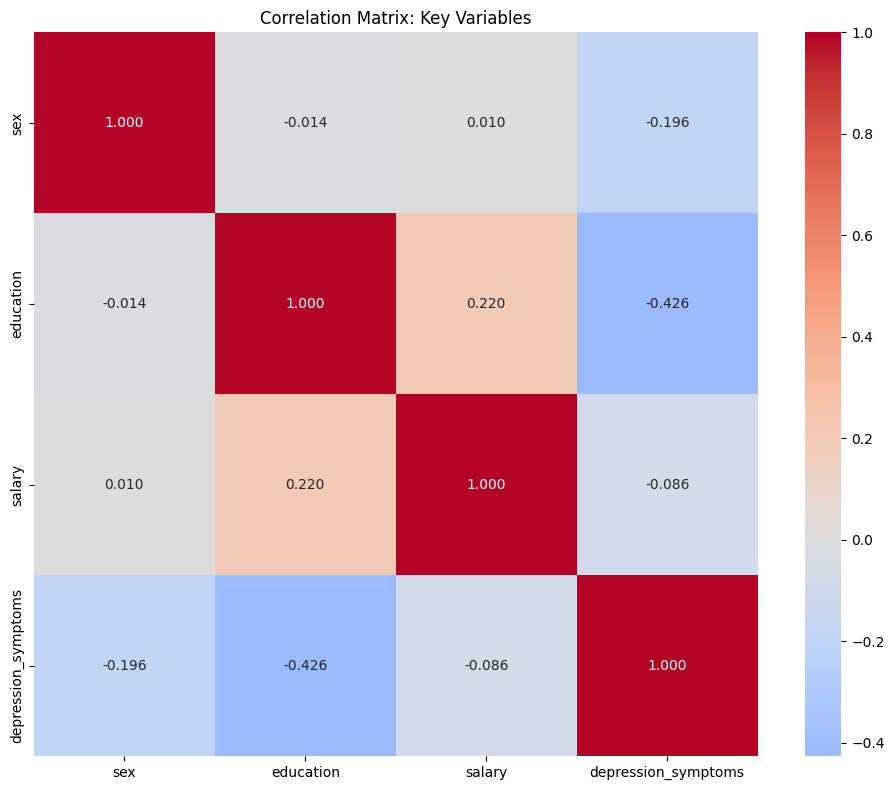

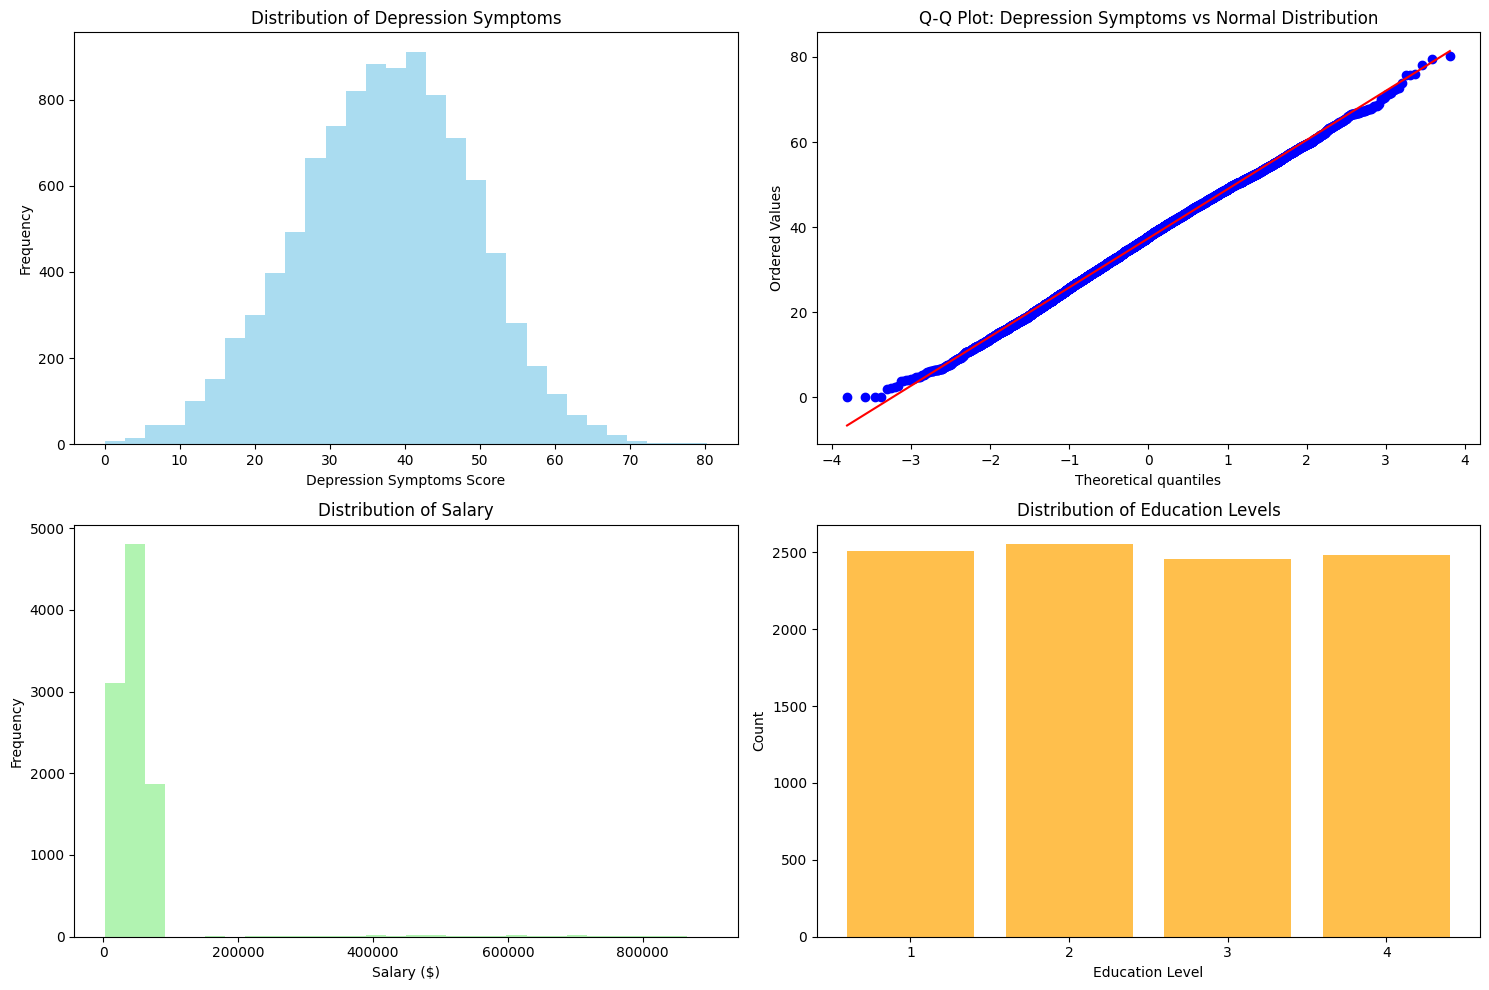


Normality test for depression symptoms (Shapiro-Wilk on sample of 5000):
Shapiro-Wilk statistic: 0.9985, p-value: 1.1297e-04
Note: Large sample sizes often show significant departures from normality even for approximately normal data


In [ ]:
# Step 3: Exploratory Data Analysis

# Correlation matrix
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = analysis_df[['sex', 'education', 'salary', 'depression_symptoms']].corr()
print("Correlation matrix:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix: Key Variables')
plt.tight_layout()
plt.show()

# Distribution of outcome variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Depression symptoms distribution
axes[0,0].hist(analysis_df['depression_symptoms'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Depression Symptoms')
axes[0,0].set_xlabel('Depression Symptoms Score')
axes[0,0].set_ylabel('Frequency')

# Q-Q plot for normality check
stats.probplot(analysis_df['depression_symptoms'], dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot: Depression Symptoms vs Normal Distribution')

# Salary distribution (log scale due to skewness)
axes[1,0].hist(analysis_df['salary'], bins=30, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Distribution of Salary')
axes[1,0].set_xlabel('Salary ($)')
axes[1,0].set_ylabel('Frequency')

# Education distribution
education_counts = analysis_df['education'].value_counts().sort_index()
axes[1,1].bar(education_counts.index, education_counts.values, alpha=0.7, color='orange')
axes[1,1].set_title('Distribution of Education Levels')
axes[1,1].set_xlabel('Education Level')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks([1, 2, 3, 4])

plt.tight_layout()
plt.show()

print(f"\nNormality test for depression symptoms (Shapiro-Wilk on sample of 5000):")
sample_depression = np.random.choice(analysis_df['depression_symptoms'], size=5000, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_depression)
print(f"Shapiro-Wilk statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4e}")
print("Note: Large sample sizes often show significant departures from normality even for approximately normal data")

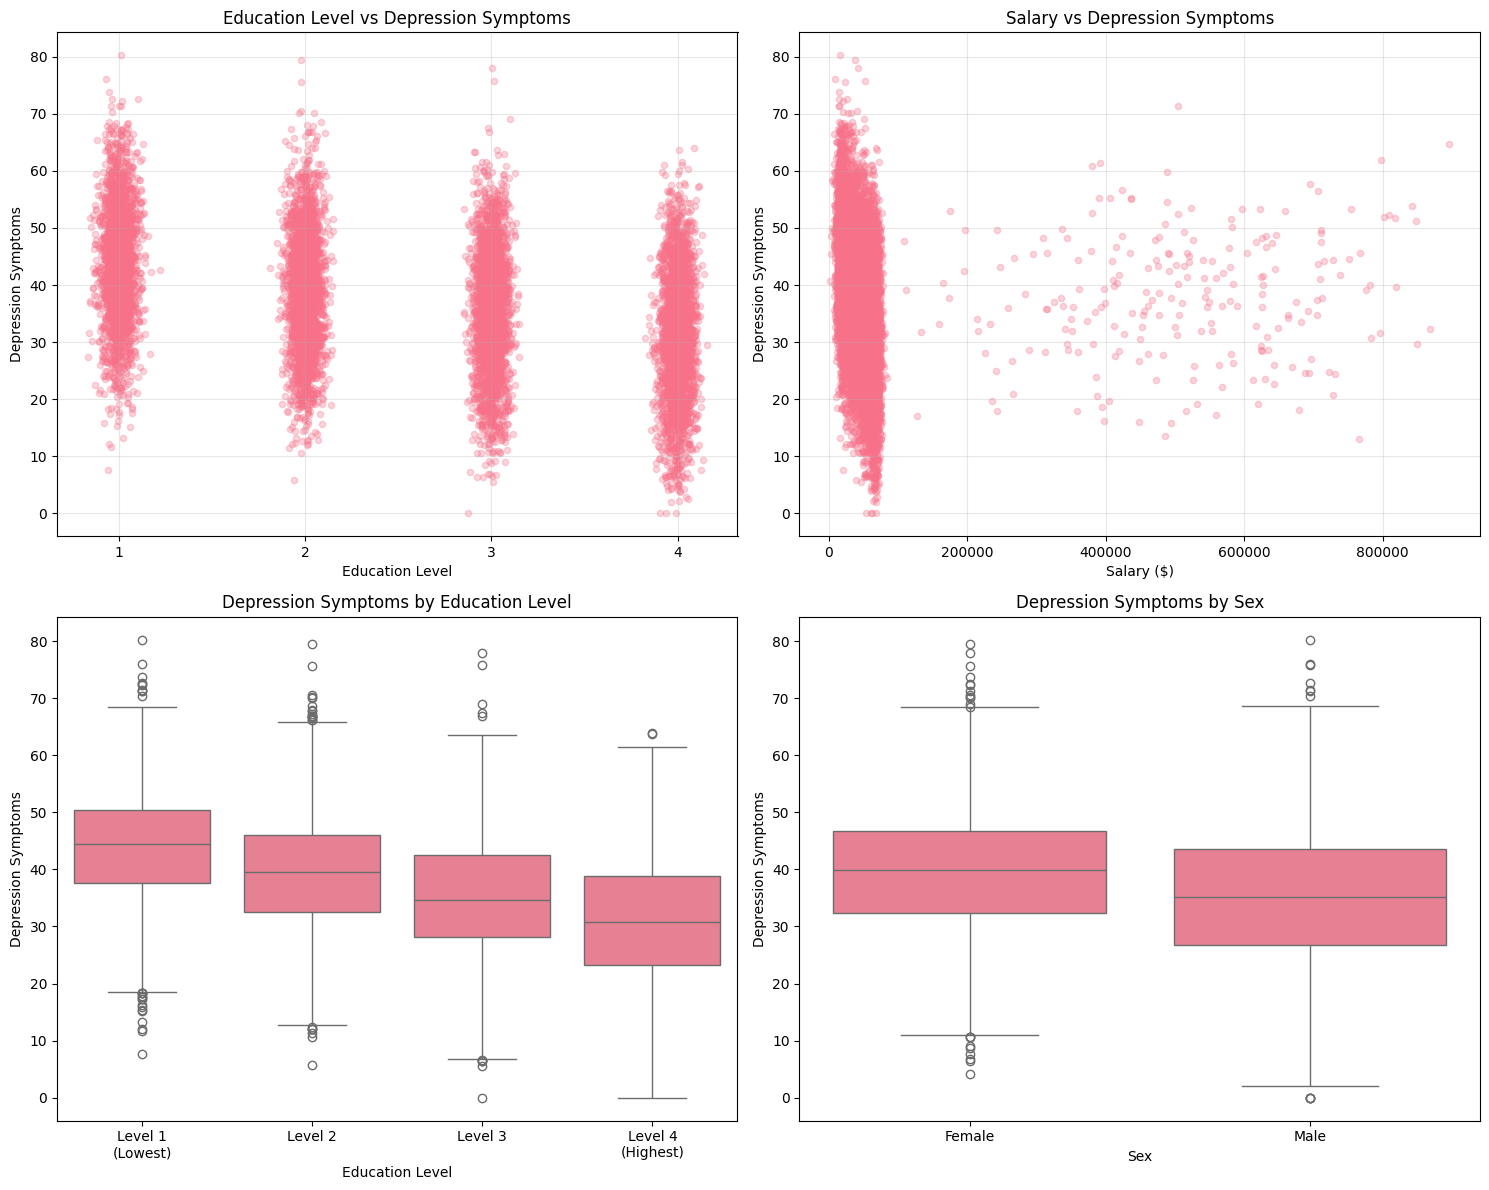

=== GROUP-WISE SUMMARY STATISTICS ===

Depression symptoms by Education Level:
                   count   mean    std  median
Level 1 (Lowest)    2510  44.18   9.82   44.44
Level 2             2551  39.25  10.14   39.49
Level 3             2458  35.10  10.61   34.73
Level 4 (Highest)   2481  30.89  11.18   30.76

Depression symptoms by Sex:
           count   mean    std  median
sex_label                             
Female      5102  39.61  10.51   39.90
Male        4898  35.08  12.11   35.22

=== STATISTICAL TESTS FOR GROUP DIFFERENCES ===
One-way ANOVA for Education: F = 739.895, p = 0.00e+00
Independent t-test for Sex: t = 20.036, p = 1.37e-87
Effect size (Cohen's d): 0.401


In [ ]:
# Scatter plots and box plots for relationship visualization

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Education vs Depression (with jitter to avoid overlapping)
education_jitter = analysis_df['education'] + np.random.normal(0, 0.05, len(analysis_df))
axes[0,0].scatter(education_jitter, analysis_df['depression_symptoms'], alpha=0.3, s=20)
axes[0,0].set_xlabel('Education Level')
axes[0,0].set_ylabel('Depression Symptoms')
axes[0,0].set_title('Education Level vs Depression Symptoms')
axes[0,0].set_xticks([1, 2, 3, 4])
axes[0,0].grid(True, alpha=0.3)

# Salary vs Depression
axes[0,1].scatter(analysis_df['salary'], analysis_df['depression_symptoms'], alpha=0.3, s=20)
axes[0,1].set_xlabel('Salary ($)')
axes[0,1].set_ylabel('Depression Symptoms')
axes[0,1].set_title('Salary vs Depression Symptoms')
axes[0,1].grid(True, alpha=0.3)

# Box plot: Depression by Education Level
sns.boxplot(data=analysis_df, x='education', y='depression_symptoms', ax=axes[1,0])
axes[1,0].set_xlabel('Education Level')
axes[1,0].set_ylabel('Depression Symptoms')
axes[1,0].set_title('Depression Symptoms by Education Level')
axes[1,0].set_xticklabels(['Level 1\n(Lowest)', 'Level 2', 'Level 3', 'Level 4\n(Highest)'])

# Box plot: Depression by Sex
sns.boxplot(data=analysis_df, x='sex_label', y='depression_symptoms', ax=axes[1,1])
axes[1,1].set_xlabel('Sex')
axes[1,1].set_ylabel('Depression Symptoms')
axes[1,1].set_title('Depression Symptoms by Sex')

plt.tight_layout()
plt.show()

# Summary statistics by groups
print("=== GROUP-WISE SUMMARY STATISTICS ===")
print("\nDepression symptoms by Education Level:")
education_summary = analysis_df.groupby('education')['depression_symptoms'].agg(['count', 'mean', 'std', 'median'])
education_summary.index = ['Level 1 (Lowest)', 'Level 2', 'Level 3', 'Level 4 (Highest)']
print(education_summary.round(2))

print("\nDepression symptoms by Sex:")
sex_summary = analysis_df.groupby('sex_label')['depression_symptoms'].agg(['count', 'mean', 'std', 'median'])
print(sex_summary.round(2))

# Test for group differences
print("\n=== STATISTICAL TESTS FOR GROUP DIFFERENCES ===")
# ANOVA for education levels
from scipy.stats import f_oneway
edu_groups = [analysis_df[analysis_df['education'] == i]['depression_symptoms'] for i in [1, 2, 3, 4]]
f_stat, p_val = f_oneway(*edu_groups)
print(f"One-way ANOVA for Education: F = {f_stat:.3f}, p = {p_val:.2e}")

# T-test for sex differences
from scipy.stats import ttest_ind
female_depression = analysis_df[analysis_df['sex'] == 0]['depression_symptoms']
male_depression = analysis_df[analysis_df['sex'] == 1]['depression_symptoms']
t_stat, p_val = ttest_ind(female_depression, male_depression)
print(f"Independent t-test for Sex: t = {t_stat:.3f}, p = {p_val:.2e}")
print(f"Effect size (Cohen's d): {(female_depression.mean() - male_depression.mean()) / np.sqrt(((len(female_depression)-1)*female_depression.var() + (len(male_depression)-1)*male_depression.var()) / (len(female_depression) + len(male_depression) - 2)):.3f}")

In [ ]:
# Step 4: Linear Regression Analyses

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import jarque_bera

print("=== LINEAR REGRESSION MODELS ===")

# Prepare data for regression
X_education_sex = analysis_df[['education', 'sex']].copy()
X_salary_sex = analysis_df[['salary', 'sex']].copy()
X_full = analysis_df[['education', 'salary', 'sex']].copy()
y = analysis_df['depression_symptoms']

# Standardize salary for better interpretability (divide by 10,000)
X_salary_sex['salary_10k'] = X_salary_sex['salary'] / 10000
X_full['salary_10k'] = X_full['salary'] / 10000

# Model 1: Education + Sex
print("\n" + "="*60)
print("MODEL 1: Depression ~ Education + Sex")
print("="*60)

X1 = sm.add_constant(X_education_sex[['education', 'sex']])
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

# Model 2: Salary + Sex  
print("\n" + "="*60)
print("MODEL 2: Depression ~ Salary + Sex")
print("="*60)

X2 = sm.add_constant(X_salary_sex[['salary_10k', 'sex']])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

# Model 3: Full model (Education + Salary + Sex)
print("\n" + "="*60)
print("MODEL 3: Depression ~ Education + Salary + Sex (Full Model)")
print("="*60)

X3 = sm.add_constant(X_full[['education', 'salary_10k', 'sex']])
model3 = sm.OLS(y, X3).fit()
print(model3.summary())

# Store models for diagnostics
models = {'Model 1 (Education + Sex)': model1, 
          'Model 2 (Salary + Sex)': model2, 
          'Model 3 (Full Model)': model3}

print("\n=== MODEL COMPARISON SUMMARY ===")
print(f"{'Model':<25} {'R-squared':<12} {'Adj R-squared':<15} {'AIC':<10} {'F-statistic':<12}")
print("-" * 75)
for name, model in models.items():
    print(f"{name:<25} {model.rsquared:<12.4f} {model.rsquared_adj:<15.4f} {model.aic:<10.1f} {model.fvalue:<12.2f}")

=== LINEAR REGRESSION MODELS ===

MODEL 1: Depression ~ Education + Sex
                             OLS Regression Results                            
Dep. Variable:     depression_symptoms   R-squared:                       0.222
Model:                             OLS   Adj. R-squared:                  0.222
Method:                  Least Squares   F-statistic:                     1430.
Date:                 Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                         18:35:48   Log-Likelihood:                -37395.
No. Observations:                10000   AIC:                         7.480e+04
Df Residuals:                     9997   BIC:                         7.482e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------